# SMS Spam Detection

### Prepared by
#### Can Çalışkan - 190254060
#### Mehmet Ağkale - 180254038
#### Emirhan Aksoy - 190254067
#### Tevfik Hacıhamdioğlu – 210254023

#### Also Github Link: https://github.com/aweras/sms_spam_detection

# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

# Reading the dataset we've chosen

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')

# Checking a few samples

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g...",NaN,NaN,NaN
3097,ham,This is all just creepy and crazy to me.,NaN,NaN,NaN
61,ham,Ha ha ha good joke. Girls are situation seekers.,NaN,NaN,NaN
914,ham,"Call me da, i am waiting for your call.",NaN,NaN,NaN
3845,ham,Pls go there today &lt;#&gt; . I dont want an...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Dropping unnecessary columns

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
3134,ham,Wat makes some people dearer is not just de ha...
399,ham,Hmmm...k...but i want to change the field quic...
1668,ham,"Yes..but they said its IT.,"
2318,ham,On the way to office da..
135,ham,I only haf msn. It's yijue@hotmail.com


In [ ]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,label,text
562,ham,Geeeee ... I love you so much I can barely sta...
4216,ham,Will be office around 4 pm. Now i am going hos...
164,spam,BangBabes Ur order is on the way. U SHOULD rec...
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...
4089,spam,We tried to call you re your reply to our sms ...


## Encoding label

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

## Encoding labels

In [ ]:
df['label'] = encoder.fit_transform(df['label'])

In [ ]:
df.sample(5)

,label,text
5339,0,You'd like that wouldn't you? Jerk!
5207,0,"Babe, I'm answering you, can't you see me ? Ma..."
1521,0,Are you angry with me. What happen dear
3847,0,Can you plz tell me the ans. BSLVYL sent via f...
4234,1,FREEMSG: Our records indicate you may be entit...


In [ ]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

## Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


from sklearn.utils import resample

## Sampling the data to visualize

In [ ]:
#data = df.where((pd.notnull(df)), '')
data = resample(df, replace=False, n_samples=1000, random_state=42)

## Vectorizering

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = df['label'].values

## Dimensionality reduction using PCA
## Reducing the data to 2 dimensions for visualization.

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

## 2D Visualization

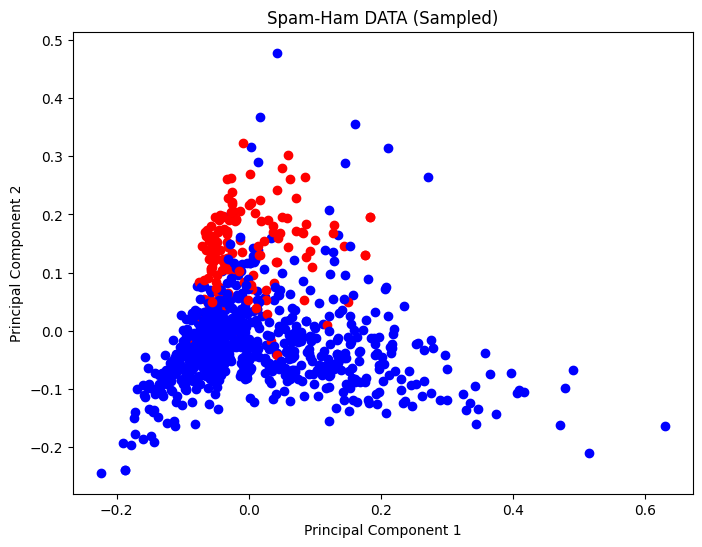

In [ ]:
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}  # 0: Ham (blue), 1: Spam (red)
for i in range(len(X_pca)):
    label = data['label'].iloc[i]
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=colors[label], marker='o')

plt.title('Spam-Ham DATA (Sampled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
x = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values

## Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## Models

In [ ]:
#models
dtc = DecisionTreeClassifier
knn = KNeighborsClassifier
lr = LogisticRegression
rfc = RandomForestClassifier
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Classifier and Calculations

In [ ]:
classifier_knn = knn(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn = classifier_knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))
print(precision_score(y_test,y_pred_knn))
print(recall_score(y_test,y_pred_knn))

0.9487427466150871
[[896   0]
 [ 53  85]]
0.7623318385650223
1.0
0.6159420289855072


In [ ]:
classifier_dtc = dtc(criterion = 'entropy', random_state = 0)
classifier_dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dtc = classifier_dtc.predict(x_test)
print(accuracy_score(y_test,y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))
print(f1_score(y_test,y_pred_dtc))
print(precision_score(y_test,y_pred_dtc))
print(recall_score(y_test,y_pred_dtc))

0.9555125725338491
[[881  15]
 [ 31 107]]
0.8230769230769229
0.8770491803278688
0.7753623188405797


In [ ]:
classifier_rfc = rfc(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_rfc = classifier_rfc.predict(x_test)
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(f1_score(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))
print(recall_score(y_test,y_pred_rfc))

0.9564796905222437
[[895   1]
 [ 44  94]]
0.8068669527896996
0.9894736842105263
0.6811594202898551


In [ ]:
classifier_lr = lr(random_state = 0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_lr = classifier_lr.predict(x_test)
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(f1_score(y_test,y_pred_lr))
print(precision_score(y_test,y_pred_lr))
print(recall_score(y_test,y_pred_lr))

0.9535783365570599
[[895   1]
 [ 47  91]]
0.7913043478260869
0.9891304347826086
0.6594202898550725


In [ ]:
classifier_gnb = gnb
classifier_gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_gnb = classifier_gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(f1_score(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))
print(recall_score(y_test,y_pred_gnb))

0.9110251450676983
[[823  73]
 [ 19 119]]
0.7212121212121211
0.6197916666666666
0.8623188405797102


In [ ]:
classifier_mnb = mnb
classifier_mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred_mnb = classifier_mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(f1_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))
print(recall_score(y_test,y_pred_mnb))

0.9506769825918762
[[896   0]
 [ 51  87]]
0.7733333333333333
1.0
0.6304347826086957


In [ ]:
classifier_bnb = bnb
classifier_bnb.fit(x_train, y_train)

BernoulliNB()

In [ ]:
y_pred_bnb = classifier_bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(f1_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(recall_score(y_test,y_pred_bnb))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.911196911196911
0.9752066115702479
0.855072463768116


# PART 2

Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Düzeltme parametresi
    'binarize': [0.0, 0.1, 0.2, 0.5]  # Eşik değeri
}

bnb_grid = GridSearchCV(BernoulliNB(), param_grid, cv=5)

bnb_grid.fit(x_train, y_train)


print("Best parameters:", bnb_grid.best_params_)
print("Best Score:", bnb_grid.best_score_)

Best parameters: {'alpha': 0.1, 'binarize': 0.0}
Best Score: 0.9862152357920193


Feature Engineering:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Varyansın %95'ini koru
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)  # Ki-kare testine dayalı en iyi k özelliği seç
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

Ensemble Method

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('bnb', BernoulliNB()),
    ('rf', RandomForestClassifier())
]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_classifier.fit(x_train, y_train)


StackingClassifier(estimators=[('bnb', BernoulliNB()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_sc = stacking_classifier.predict(x_test)

# Doğruluk skorunu hesaplayın
accuracy = accuracy_score(y_test, y_pred_sc)
print("Accuracy score:", accuracy)

Accuracy score: 0.988394584139265


AutoML:AutoGluon

In [ ]:
!pip install autogluon

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

df_train = train_data
df_test = test_data

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(df_train)

subsample_size = 500
train_data = train_data.sample(n=subsample_size, random_state=0)

print(train_data.head())

      label  \
3209      0   
502       0   
1334      0   
44        0   
1221      0   

                                                                                                                                                        text  
3209       She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife,  
502                                                                                                                                  Check with nuerologist.  
1334  Oh ! A half hour is much longer in Syria than Canada, eh ? Wow you must get SO much more work done in a day than us with all that extra time ! *grins*  
44                                                                                  Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...  
1221                                                                                                              

In [ ]:
label = 'label'
print(f"Unique classes: {list(train_data[label].unique())}")

Unique classes: [0, 1]


In [ ]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_142938"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240505_142938"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [ ]:
test_data = TabularDataset(df_test)
test_data.head()

,label,text
1617,0,Did u download the fring app?
2064,0,Pass dis to all ur contacts n see wat u get! Red;i'm in luv wid u. Blue;u put a smile on my face. Purple;u r realy hot. Pink;u r so swt. Orange;i thnk i lyk u. Green;i realy wana go out wid u. Yelow;i wnt u bck. Black;i'm jealous of u. Brown;i miss you Nw plz giv me one color
1272,0,Ok...
3020,0,Am in film ill call you later.
3642,0,"Sorry, left phone upstairs. OK, might be hectic but would be all my birds with one fell swoop. It's a date."


In [ ]:
y_pred = predictor.predict(test_data)
y_pred.head()

1617    0
2064    0
1272    0
3020    0
3642    0
Name: label, dtype: int64

In [ ]:
y_pred_proba = predictor.predict_proba(test_data)
y_pred_proba.head()

,0,1
1617,1.0,0.0
2064,1.0,0.0
1272,1.0,0.0
3020,1.0,0.0
3642,1.0,0.0


In [ ]:
predictor.evaluate(test_data)

{'accuracy': 0.9738878143133463,
 'balanced_accuracy': 0.929983321050386,
 'mcc': 0.8890840785335297,
 'roc_auc': 0.9613824134052208,
 'f1': 0.9032258064516129,
 'precision': 0.9402985074626866,
 'recall': 0.8689655172413793}

In [ ]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif,0.973888,1.00,accuracy,0.007334,0.003189,0.025908,0.007334,0.003189,0.025908,1,True,1
1,KNeighborsDist,0.973888,1.00,accuracy,0.007472,0.002821,0.022045,0.007472,0.002821,0.022045,1,True,2
2,WeightedEnsemble_L2,0.973888,1.00,accuracy,0.008975,0.004280,0.318025,0.001641,0.001092,0.292117,2,True,14
3,ExtraTreesEntr,0.972921,0.98,accuracy,0.101471,0.066754,0.861589,0.101471,0.066754,0.861589,1,True,9
4,ExtraTreesGini,0.970019,0.98,accuracy,0.127477,0.067660,1.070980,0.127477,0.067660,1.070980,1,True,8
5,LightGBM,0.965184,0.98,accuracy,0.008590,0.002868,0.481210,0.008590,0.002868,0.481210,1,True,4
6,RandomForestEntr,0.964217,0.98,accuracy,0.115901,0.079342,1.001822,0.115901,0.079342,1.001822,1,True,6
7,RandomForestGini,0.964217,0.98,accuracy,0.123012,0.077869,1.007563,0.123012,0.077869,1.007563,1,True,5
8,LightGBMXT,0.963250,0.99,accuracy,0.004981,0.015980,0.480942,0.004981,0.015980,0.480942,1,True,3
9,NeuralNetTorch,0.963250,1.00,accuracy,0.036787,0.036661,2.005908,0.036787,0.036661,2.005908,1,True,12
